In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statistics
import tqdm

In [9]:
input_file = open('prices.txt', 'r')
number_of_stocks = 50
price_list = []

for i in range(number_of_stocks):
    price_list.append([])

for line in input_file:
    tokens = line.split('\n')[0].split('   ')
    #print(tokens)
    #break
    for i in range(number_of_stocks):
        price_list[i].append(float(tokens[i]))
df = pd.DataFrame()

for i in range(number_of_stocks):
    df[f'stock_{i}'] = price_list[i]

In [10]:
train_n = 250

df_train = df.iloc[0:train_n]
df_test = df.iloc[train_n:]

In [11]:
for i in range(number_of_stocks):
    for j in range(number_of_stocks):
        if i < j:
            corrcoef = np.corrcoef(df_train[f'stock_{i}'], df_train[f'stock_{j}'])[0, 1]
            time_corr_i = np.corrcoef(df_train[f'stock_{i}'], df_train.index)[0, 1]
            time_corr_j = np.corrcoef(df_train[f'stock_{j}'], df_train.index)[0, 1]
            if abs(corrcoef) >0.8 and abs(time_corr_i) < 0.7 and abs(time_corr_j) < 0.7:
                print(f'stock_{i} and stock_{j} correlation {corrcoef} time correlation of stock_{i} is {time_corr_i}, time correlation of stock_{j} is {time_corr_j}')

stock_10 and stock_46 correlation 0.8268471416051536 time correlation of stock_10 is 0.4661764136387916, time correlation of stock_46 is 0.5049109551496451
stock_10 and stock_48 correlation -0.8480905760457176 time correlation of stock_10 is 0.4661764136387916, time correlation of stock_48 is -0.6382747169756894
stock_19 and stock_32 correlation 0.8083098773353774 time correlation of stock_19 is 0.13394191982643752, time correlation of stock_32 is -0.2210286910290999
stock_32 and stock_39 correlation 0.8576622936935994 time correlation of stock_32 is -0.2210286910290999, time correlation of stock_39 is -0.3919171645787152
stock_32 and stock_45 correlation -0.861481110991012 time correlation of stock_32 is -0.2210286910290999, time correlation of stock_45 is 0.17472347505368208
stock_36 and stock_41 correlation 0.8066273723570955 time correlation of stock_36 is 0.649197083437793, time correlation of stock_41 is 0.5534063975520895
stock_38 and stock_39 correlation 0.8990922102024501 time

In [12]:
window = 20

for i in range(number_of_stocks):
    for j in range(number_of_stocks):
        if i < j:
            corrcoef = np.corrcoef(df_train[f'stock_{i}'].diff(window).dropna(), df_train[f'stock_{j}'].diff(window).dropna())[0, 1]
            time_corr_i = np.corrcoef(df_train[f'stock_{i}'], df_train.index)[0, 1]
            time_corr_j = np.corrcoef(df_train[f'stock_{j}'], df_train.index)[0, 1]
            if abs(corrcoef) >0.6:
                print(f'stock_{i} and stock_{j} {window} day move correlation {corrcoef}')

stock_2 and stock_28 20 day move correlation 0.6728611187120008
stock_3 and stock_5 20 day move correlation -0.6418718319953163
stock_9 and stock_11 20 day move correlation -0.6540907458718163
stock_12 and stock_16 20 day move correlation 0.6428108497686129
stock_20 and stock_47 20 day move correlation 0.6234670007793581
stock_26 and stock_30 20 day move correlation -0.6074436627412059
stock_27 and stock_38 20 day move correlation 0.770751974441267
stock_27 and stock_39 20 day move correlation 0.7076139281475925
stock_27 and stock_41 20 day move correlation 0.6054475367210163
stock_27 and stock_47 20 day move correlation 0.6086862082696511
stock_28 and stock_39 20 day move correlation 0.6236830577619652
stock_28 and stock_42 20 day move correlation 0.6423210351485583
stock_29 and stock_30 20 day move correlation 0.6239508866423443
stock_29 and stock_38 20 day move correlation 0.7487811635397992
stock_30 and stock_38 20 day move correlation 0.6332795148777848
stock_35 and stock_41 20 da

In [13]:
window = 20

for i in range(number_of_stocks):
    for j in range(number_of_stocks):
        if i < j:
            corrcoef = np.corrcoef(df_test[f'stock_{i}'].diff(window).dropna(), df_train[f'stock_{j}'].diff(window).dropna())[0, 1]
            time_corr_i = np.corrcoef(df_test[f'stock_{i}'], df_train.index)[0, 1]
            time_corr_j = np.corrcoef(df_test[f'stock_{j}'], df_train.index)[0, 1]
            if abs(corrcoef) >0.6:
                print(f'stock_{i} and stock_{j} {window} day move correlation {corrcoef}')

stock_3 and stock_41 20 day move correlation 0.7793817785331024
stock_7 and stock_11 20 day move correlation -0.6188394332256077
stock_9 and stock_37 20 day move correlation 0.6631288993586227
stock_22 and stock_48 20 day move correlation -0.6082514734828733
stock_30 and stock_31 20 day move correlation 0.6000181519177418
stock_36 and stock_37 20 day move correlation 0.6514571120005725
stock_40 and stock_44 20 day move correlation 0.6220623012343955
stock_41 and stock_46 20 day move correlation -0.6210486947647841


                            OLS Regression Results                            
Dep. Variable:               stock_38   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     214.3
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           1.30e-40
Time:                        21:37:05   Log-Likelihood:                 1269.3
No. Observations:                 499   AIC:                            -2535.
Df Residuals:                     497   BIC:                            -2526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0019      0.001     -2.191      0.0

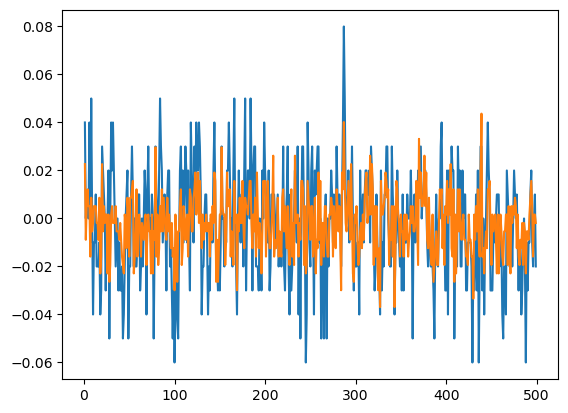

In [22]:
iv = 'stock_39'
dv = 'stock_38'

y = df[dv].diff().dropna()
X = sm.add_constant(df[iv].diff().dropna())
testmodel = sm.OLS( y,  X)
results = testmodel.fit()
print(results.summary())

plt.plot(df[dv].diff().dropna())
plt.plot(results.predict(sm.add_constant(df[iv].diff().dropna())))

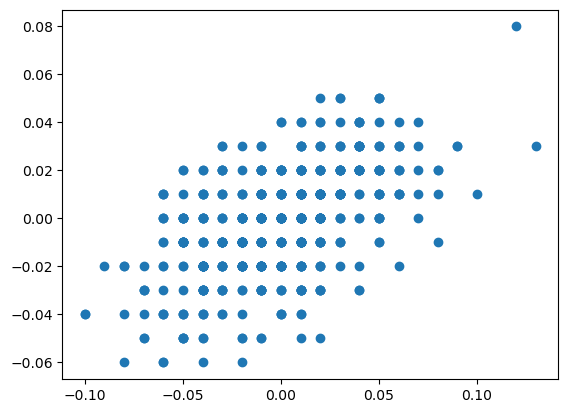

In [23]:
plt.scatter(df['stock_39'].diff(), df['stock_38'].diff())

In [227]:
y = df['stock_39']
X = sm.add_constant(df[['stock_11' , 'stock_27', 'stock_28', 'stock_38']])

model = sm.OLS(y, X)
results = model.fit(vcov = 'HC3')

In [228]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               stock_39   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     380.1
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          2.24e-149
Time:                        22:56:58   Log-Likelihood:                 373.42
No. Observations:                 500   AIC:                            -736.8
Df Residuals:                     495   BIC:                            -715.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.5957      0.923     30.993      0.000      26.783      30.408
stock_11       0.0304      0.005      6.172      0.000       0.021       0.040
stock_27      -0.3512      0.035     -9.962      0.000      -0.420      -0.282
stock_28       0.2011      0.016     12.564      0.000       0.170       0.233
stock_38       0.9129      0.044     20.954      0.000       0.827       0.998
==============================================================================
Omnibus:                        9.860   Durbin-Watson:                   0.097
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.858
Skew:                           0.331   Prob(JB):                      0.00723
Kurtosis:                       3.187   Cond. No.                     1.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [265]:
stock_a = 1
stock_b = 10

window = 20
lookback_no = 3
stock_lag_df = df_train[[f'stock_{stock_a}', f'stock_{stock_b}']]
for i in range(0, lookback_no + 1):
    stock_lag_df.loc[:,f'stock_{stock_a}_lookback_{i}'] = stock_lag_df[f'stock_{stock_a}'].diff(window).shift(window * i)
    stock_lag_df.loc[:,f'stock_{stock_b}_lookback_{i}'] = stock_lag_df[f'stock_{stock_b}'].diff(window).shift(window * i)
stock_lag_df.dropna(inplace = True)

In [266]:
ivs = [f'stock_{stock_a}_lookback_{i}' for i in range(1, lookback_no + 1)] + [f'stock_{stock_b}_lookback_{i}' for i in range(1, lookback_no+1)]#range(1, lookback_no+1)
X = stock_lag_df[ivs]
y = stock_lag_df[f'stock_{stock_b}_lookback_0']
stock_lag_model = sm.OLS(y, X)
results_lag = stock_lag_model.fit(vcov = 'HC3')
results_lag.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     stock_10_lookback_0   R-squared (uncentered):                   0.435
Model:                             OLS   Adj. R-squared (uncentered):              0.415
Method:                  Least Squares   F-statistic:                              21.09
Date:                 Sat, 22 Jun 2024   Prob (F-statistic):                    2.96e-18
Time:                         23:37:41   Log-Likelihood:                         -215.92
No. Observations:                  170   AIC:                                      443.8
Df Residuals:                      164   BIC:                                      462.7
Df Model:                            6                                                  
Covariance Type:             nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
stock_1_lookback_1      0.4679      0.059      7.915      0.000       0.351       0.585
stock_1_lookback_2      0.6406      0.069      9.238      0.000       0.504       0.777
stock_1_lookback_3      0.3717      0.059      6.341      0.000       0.256       0.488
stock_10_lookback_1    -0.1482      0.068     -2.190      0.030      -0.282      -0.015
stock_10_lookback_2    -0.1944      0.056     -3.492      0.001      -0.304      -0.084
stock_10_lookback_3    -0.4304      0.054     -7.942      0.000      -0.537      -0.323
==============================================================================
Omnibus:                        2.912   Durbin-Watson:                   0.497
Prob(Omnibus):                  0.233   Jarque-Bera (JB):                2.645
Skew:                           0.304   Prob(JB):                        0.266
Kurtosis:                       3.067   Cond. No.                         2.58
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

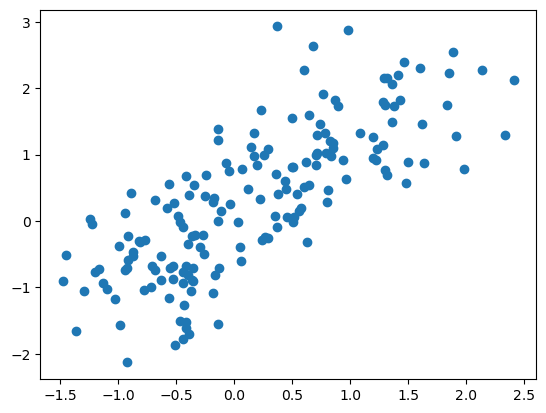

In [264]:
plt.scatter(results_lag.predict(X), y)

In [280]:
results_lag.params

stock_1_lookback_1     0.467875
stock_1_lookback_2     0.640576
stock_1_lookback_3     0.371745
stock_10_lookback_1   -0.148177
stock_10_lookback_2   -0.194429
stock_10_lookback_3   -0.430357
dtype: float64

....................

C:\Users\Yihan\AppData\Local\Temp\ipykernel_7264\3517618995.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


..............................

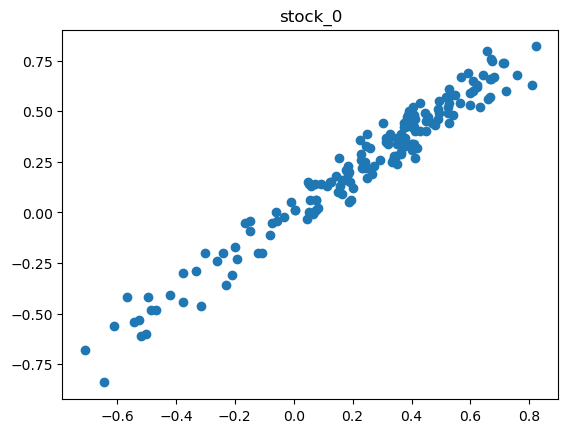

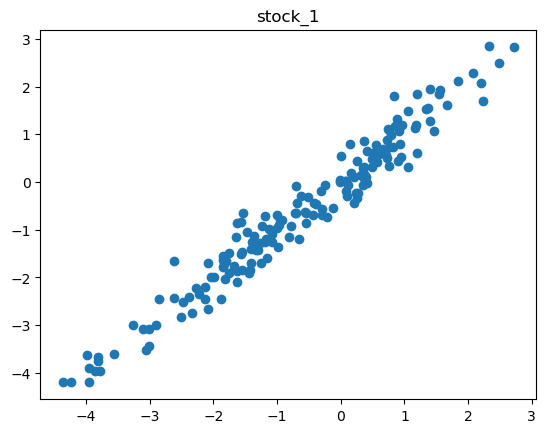

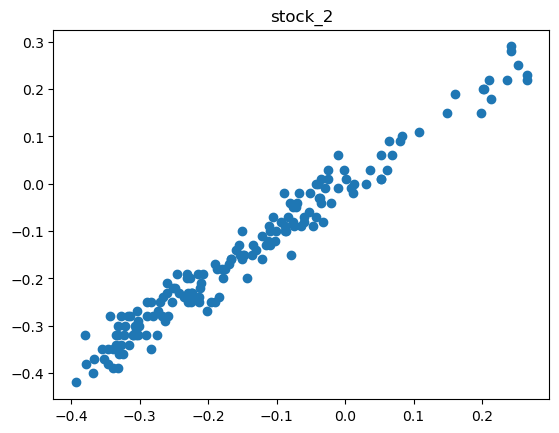

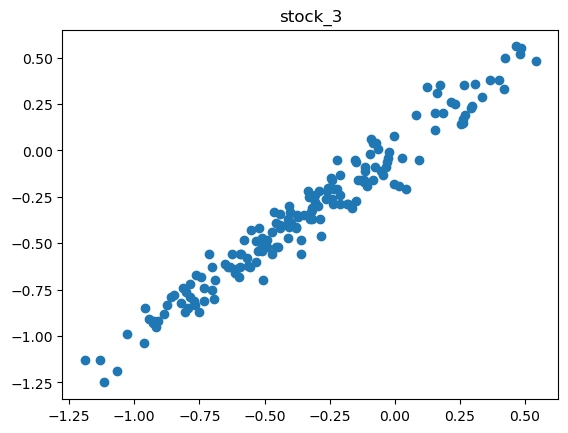

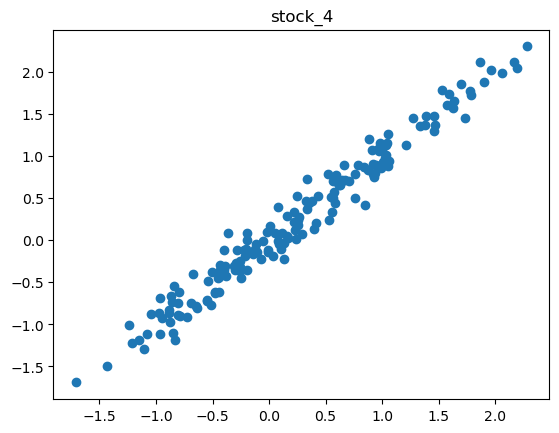

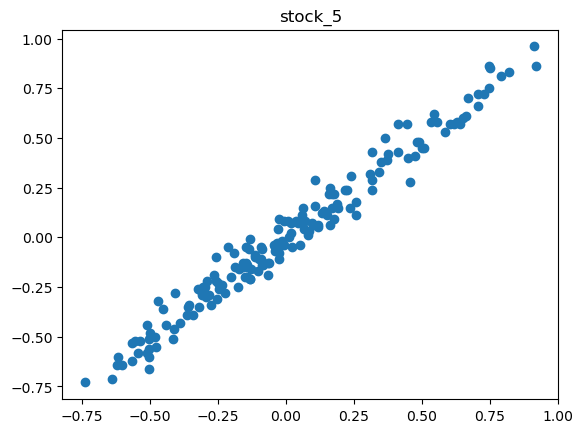

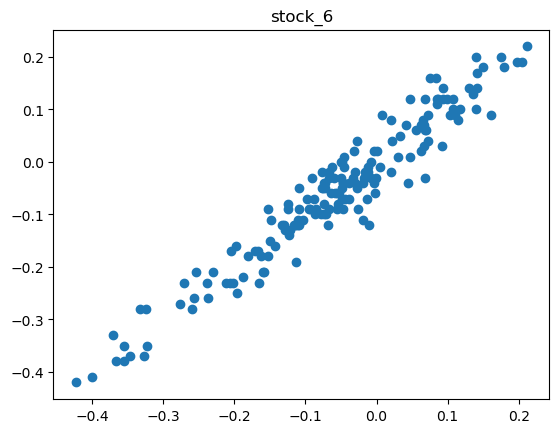

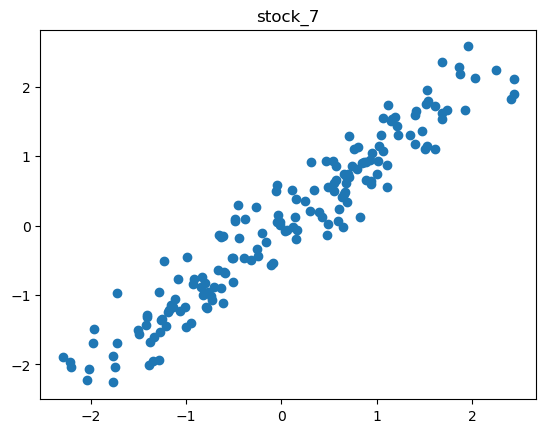

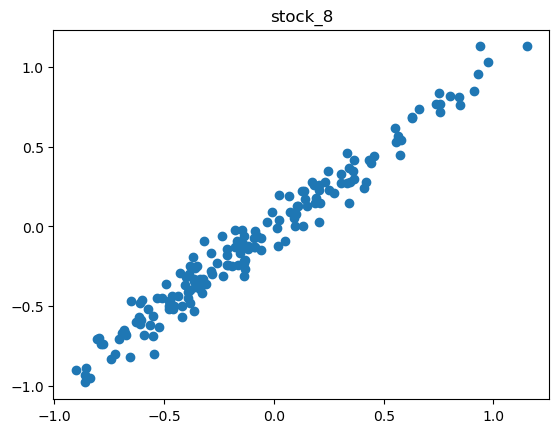

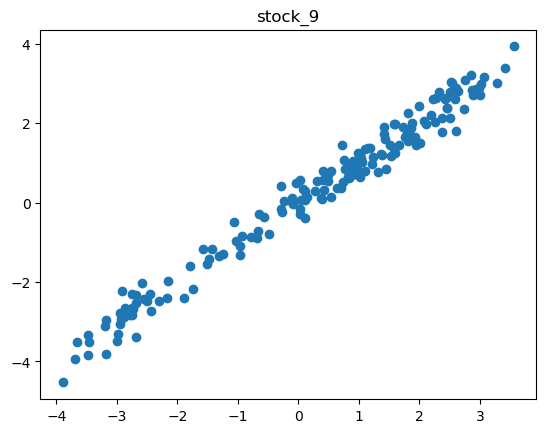

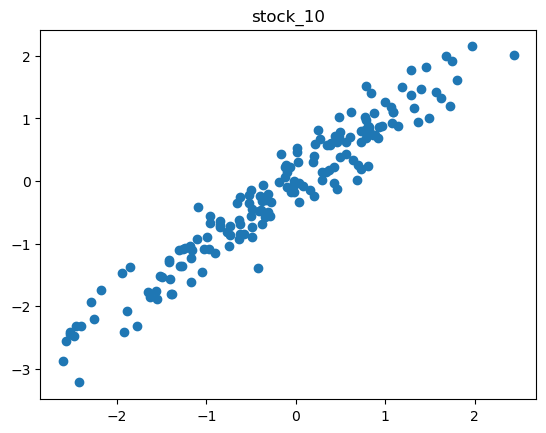

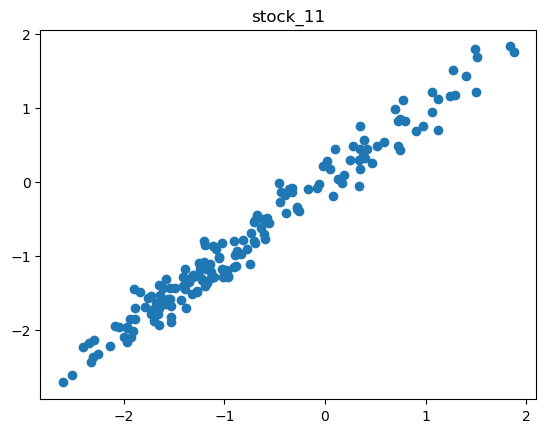

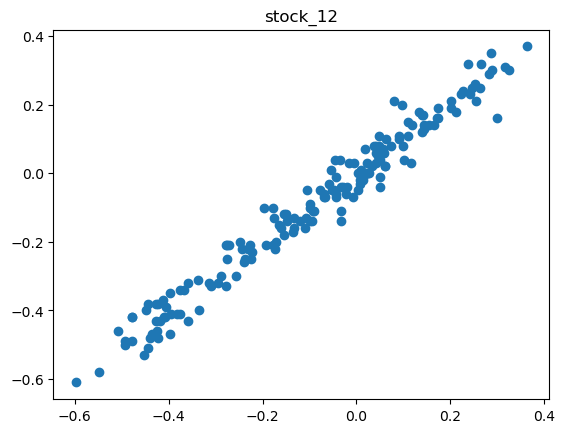

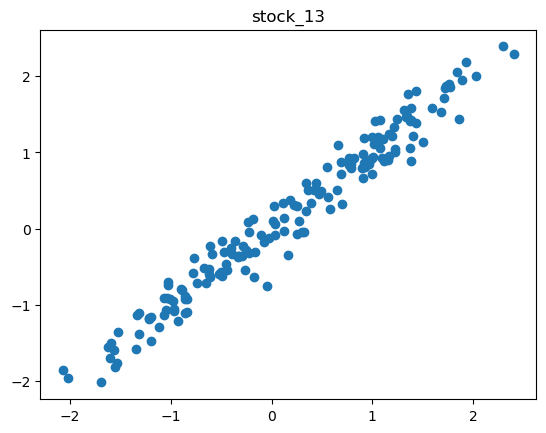

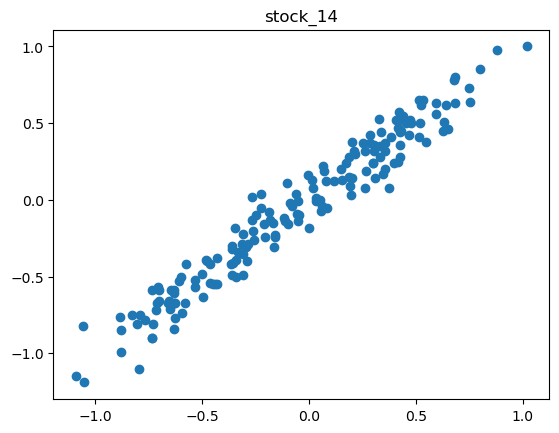

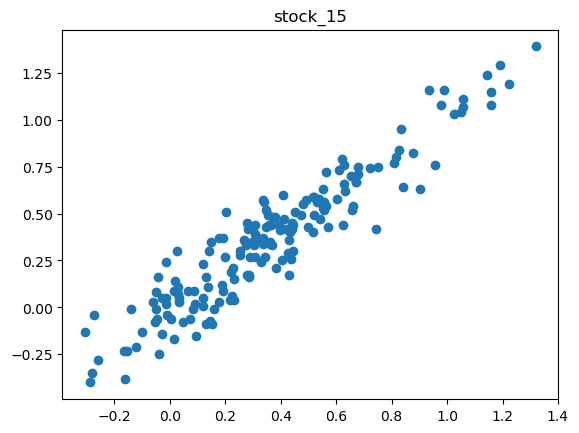

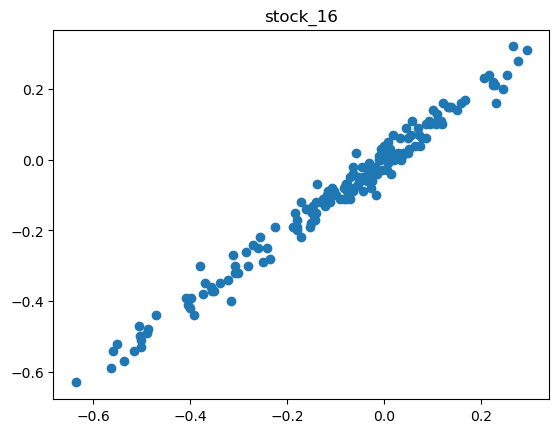

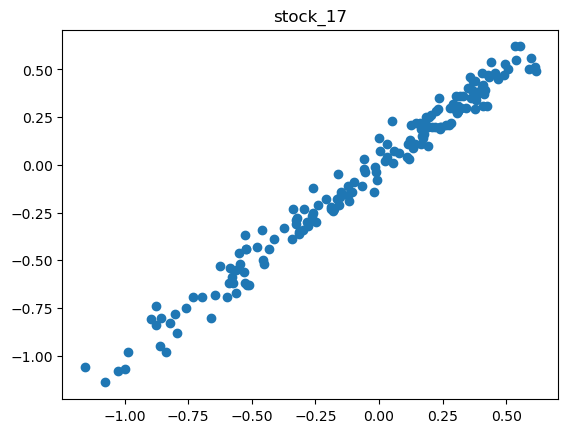

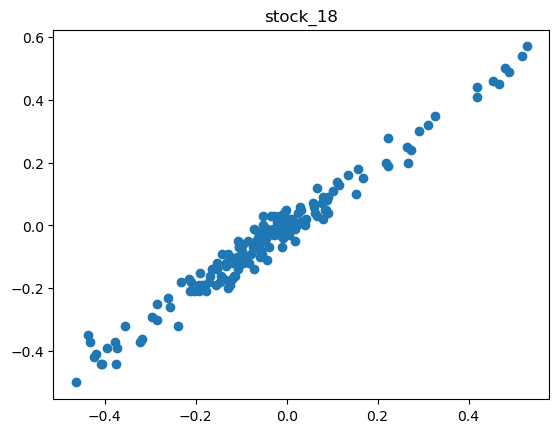

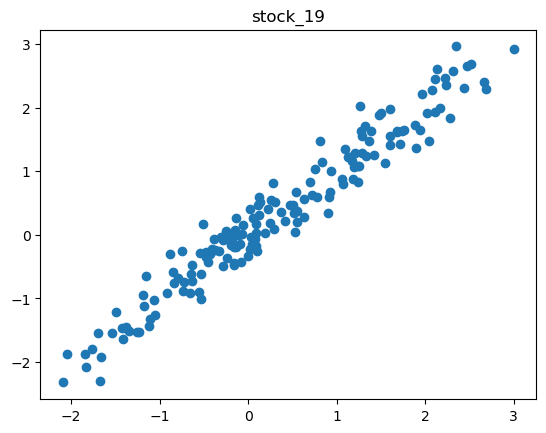

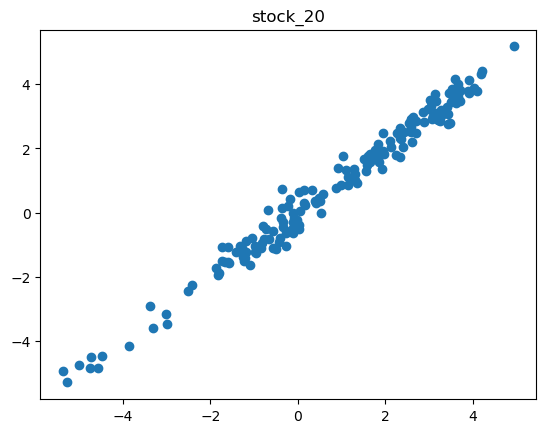

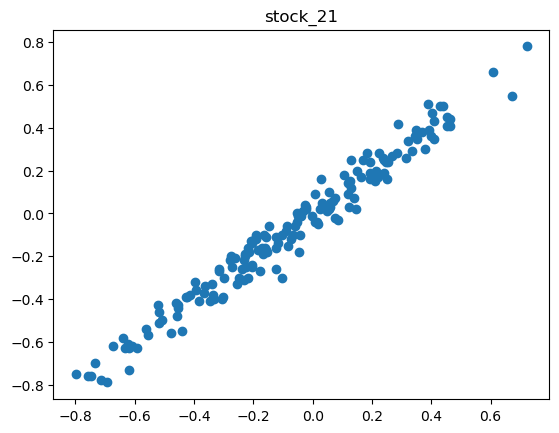

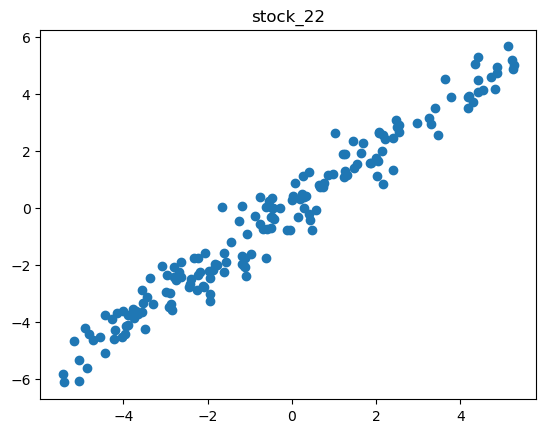

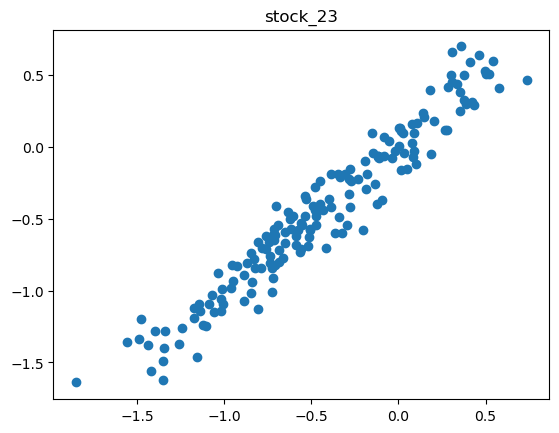

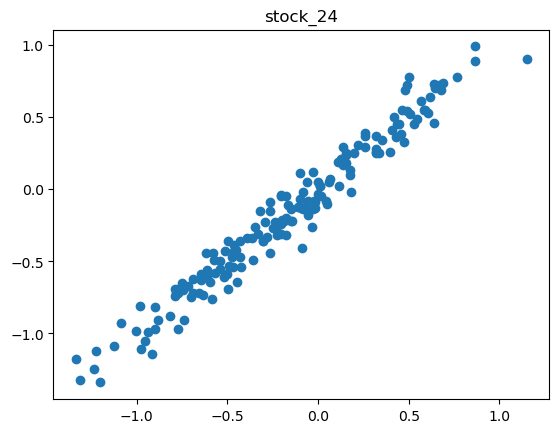

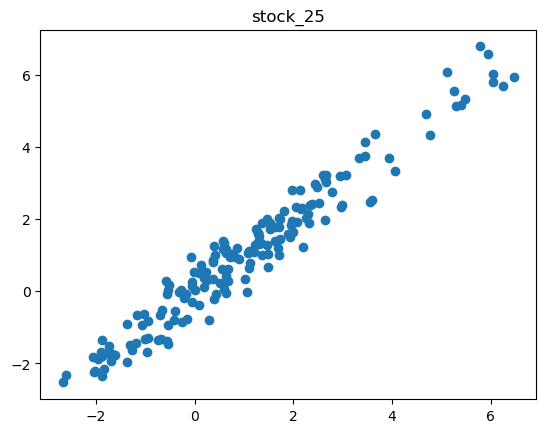

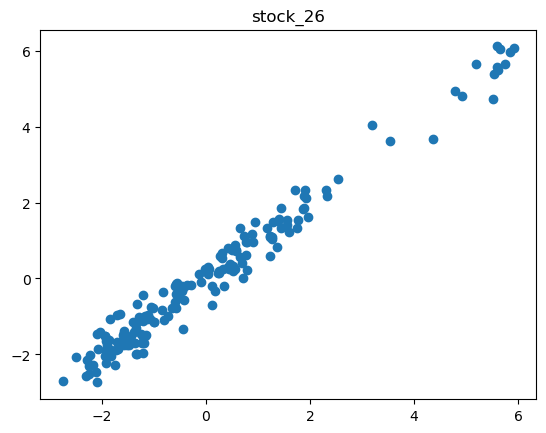

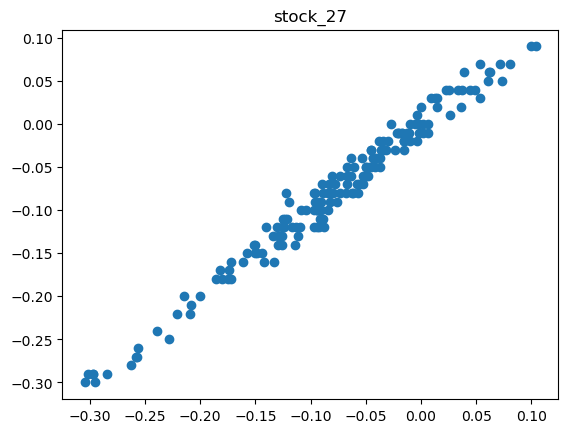

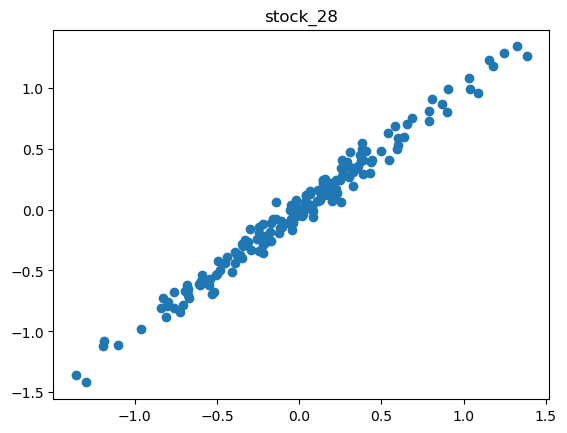

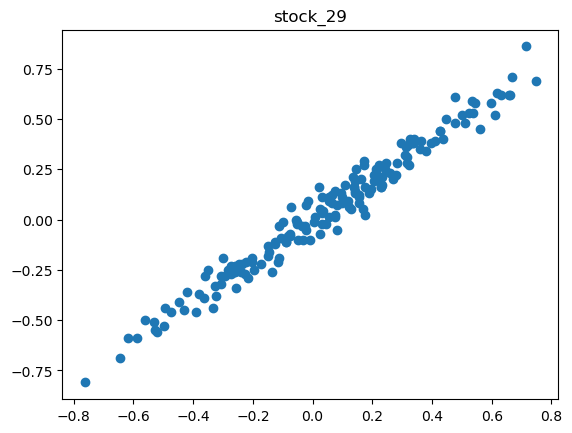

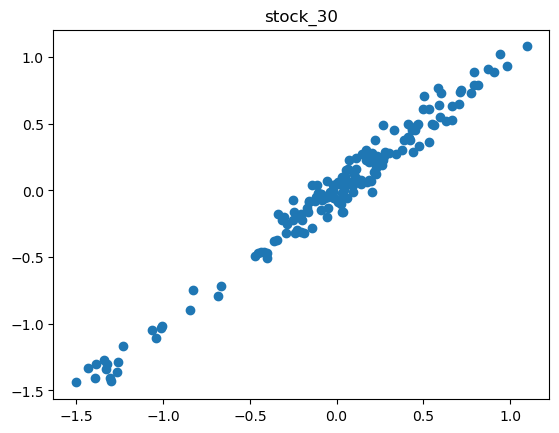

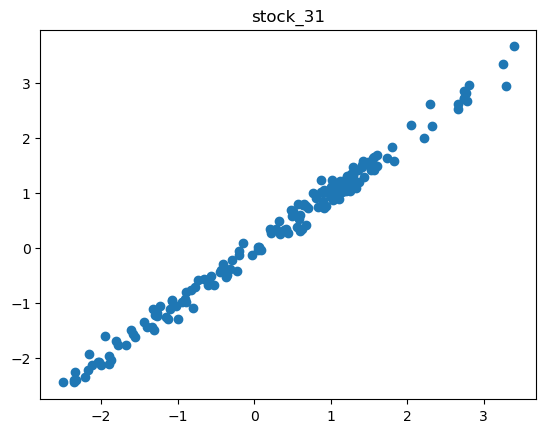

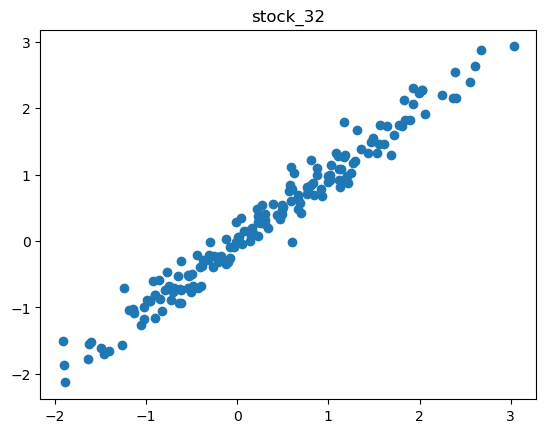

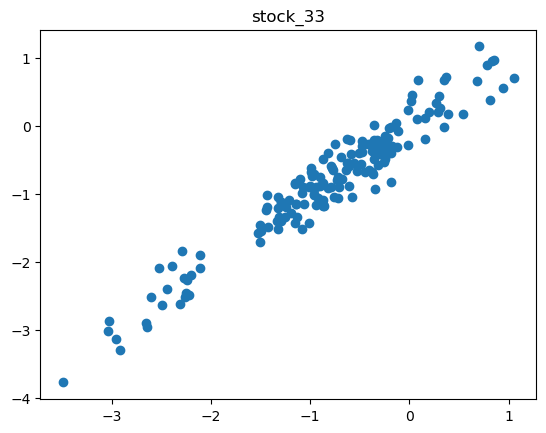

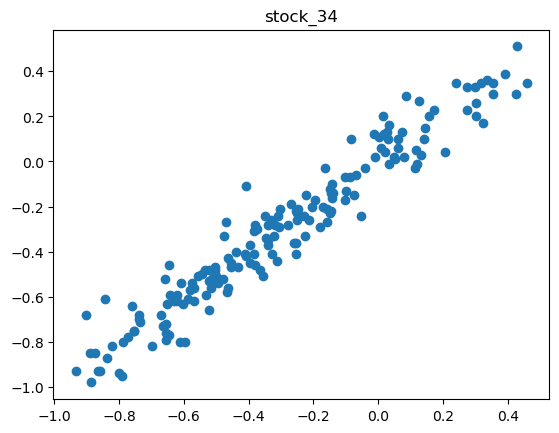

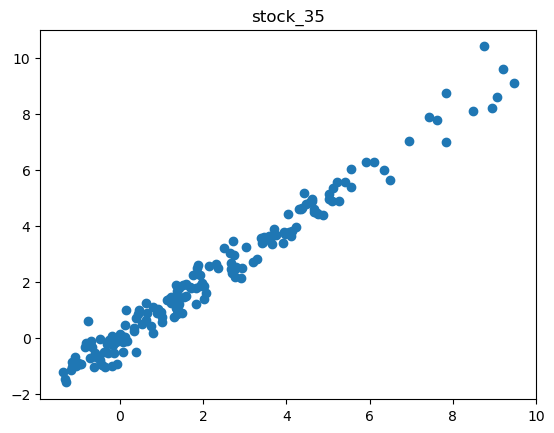

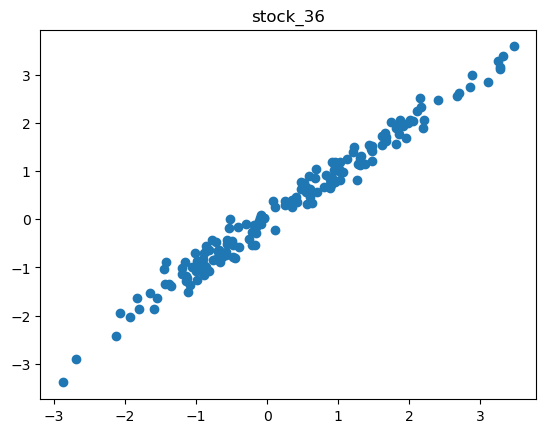

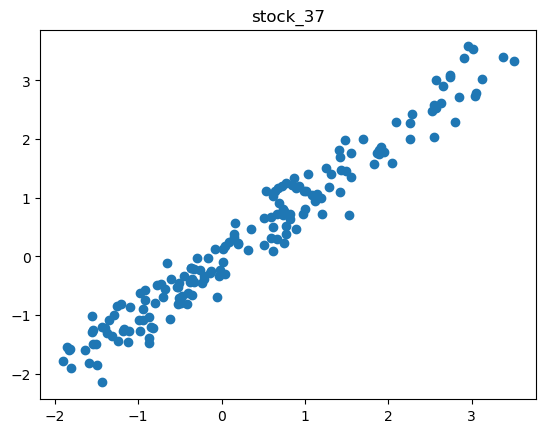

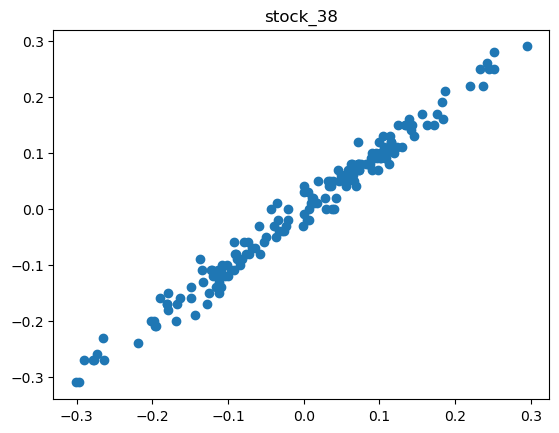

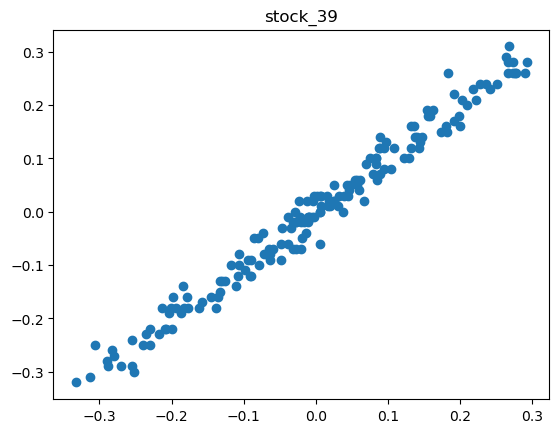

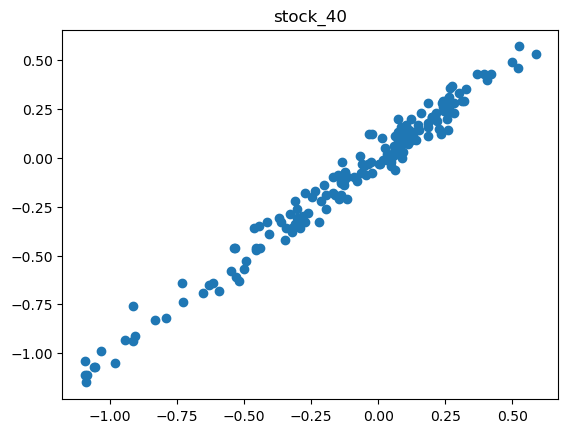

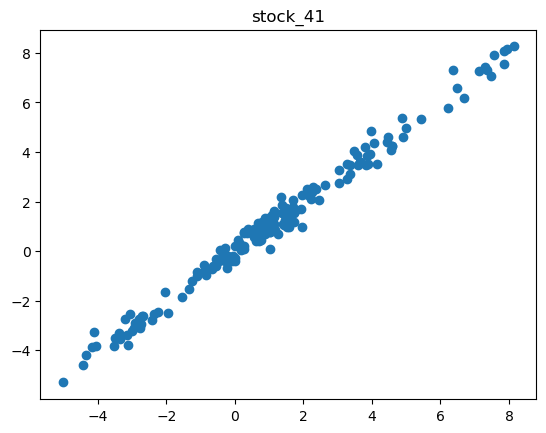

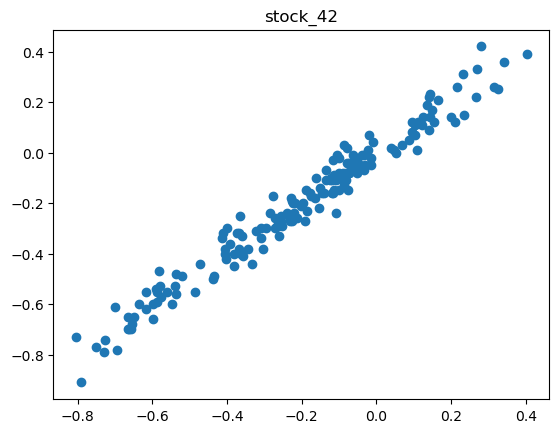

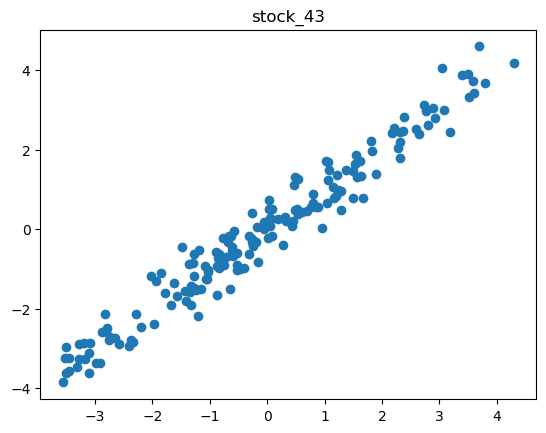

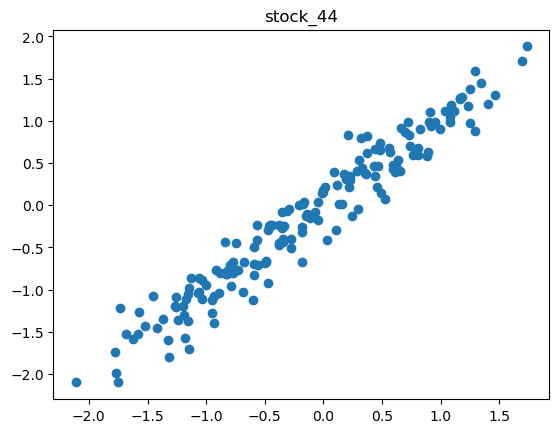

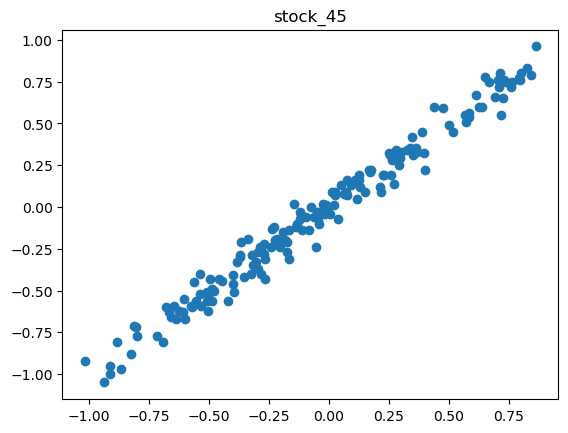

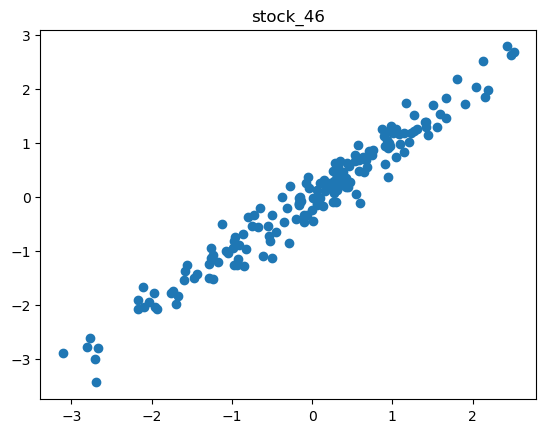

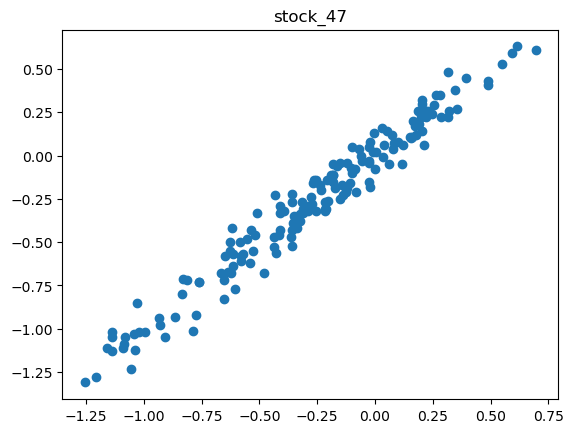

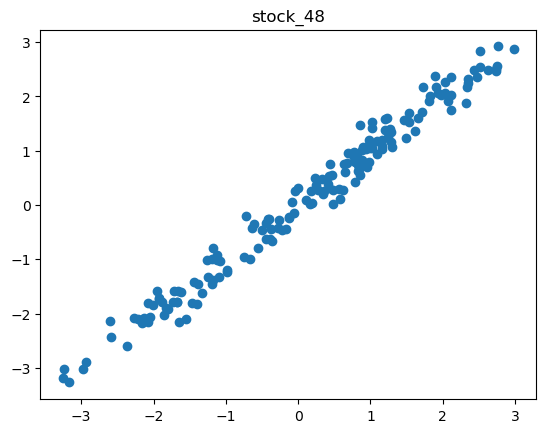

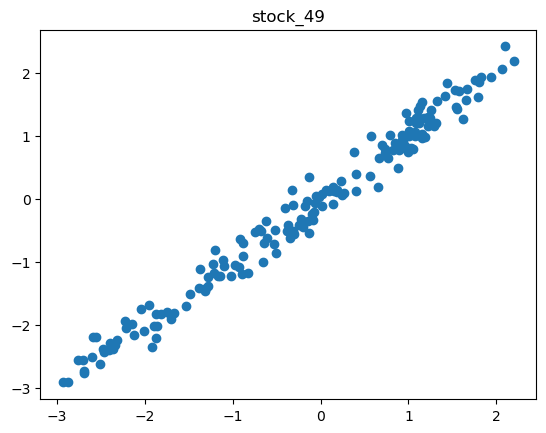

<Figure size 640x480 with 0 Axes>

In [188]:
pd.options.mode.chained_assignment = None

window = 20
lookback_no = 3
alpha = 0.01
signals = {}

models = {}


for i in range(number_of_stocks):
    print('.', end = '')
    signals[f'stock_{i}'] = []
    df_stock = df_train[[f'stock_{i}']]
    for j in range(number_of_stocks):
        df_temp = df_train[[f'stock_{i}', f'stock_{j}']]
        if i == j:
            df_temp = df_train[[f'stock_{i}']]
        df_temp[f'stock_{i}_lookback_0'] = df_temp[f'stock_{i}'].diff(window).copy(deep = True)
        df_stock[f'stock_{i}_lookback_0'] = df_train[f'stock_{i}'].diff(window).copy(deep = True)
        
        for offset in range(1, lookback_no + 1):
            df_temp[f'stock_{j}_lookback_{offset}'] = df_temp[f'stock_{j}'].diff(window).shift(window * offset).copy(deep = True)
            df_temp.dropna(inplace = True)

            y = df_temp[f'stock_{i}_lookback_0']
            X = sm.add_constant(df_temp[f'stock_{j}_lookback_{offset}'])

            model = sm.OLS(y, X)
            results = model.fit(vcov = 'HC3')

            if results.pvalues[f'stock_{j}_lookback_{offset}'] < alpha:
                signals[f'stock_{i}'].append(f'stock_{j}_lookback_{offset}')
                df_stock[f'stock_{j}_lookback_{offset}'] = df_train[f'stock_{j}'].diff(window).shift(window * offset).copy(deep = True)
    if len(signals[f'stock_{i}']) > 0:
        df_stock.dropna(inplace = True)
        y = df_stock[f'stock_{i}_lookback_0']
        X = df_stock[signals[f'stock_{i}']]
        stock_model = sm.OLS(y, X)
        stock_results = stock_model.fit(vcov = 'HC3')
    
        plt.scatter(stock_results.predict(X), y)
        plt.title(f'stock_{i}')
        plt.figure()

        models[f'stock_{i}'] = stock_results


In [189]:
signals

{'stock_0': ['stock_0_lookback_3',
  'stock_1_lookback_2',
  'stock_2_lookback_2',
  'stock_2_lookback_3',
  'stock_3_lookback_1',
  'stock_4_lookback_1',
  'stock_4_lookback_3',
  'stock_5_lookback_1',
  'stock_5_lookback_3',
  'stock_6_lookback_1',
  'stock_6_lookback_2',
  'stock_6_lookback_3',
  'stock_7_lookback_1',
  'stock_8_lookback_1',
  'stock_8_lookback_2',
  'stock_8_lookback_3',
  'stock_9_lookback_1',
  'stock_10_lookback_2',
  'stock_11_lookback_1',
  'stock_13_lookback_1',
  'stock_13_lookback_3',
  'stock_14_lookback_1',
  'stock_14_lookback_3',
  'stock_15_lookback_1',
  'stock_16_lookback_3',
  'stock_17_lookback_1',
  'stock_17_lookback_3',
  'stock_18_lookback_2',
  'stock_19_lookback_3',
  'stock_20_lookback_1',
  'stock_21_lookback_3',
  'stock_23_lookback_2',
  'stock_23_lookback_3',
  'stock_24_lookback_1',
  'stock_24_lookback_3',
  'stock_25_lookback_1',
  'stock_26_lookback_3',
  'stock_27_lookback_2',
  'stock_29_lookback_3',
  'stock_30_lookback_1',
  'sto

In [154]:
models['stock_27'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     stock_27_lookback_0   R-squared (uncentered):                   0.569
Model:                             OLS   Adj. R-squared (uncentered):              0.544
Method:                  Least Squares   F-statistic:                              22.97
Date:                 Sat, 22 Jun 2024   Prob (F-statistic):                    4.32e-69
Time:                         17:11:19   Log-Likelihood:                          1593.9
No. Observations:                  497   AIC:                                     -3134.
Df Residuals:                      470   BIC:                                     -3020.
Df Model:                           27                                                  
Covariance Type:             nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
stock_7_lookback_1      0.0066      0.001      5.411      0.000       0.004       0.009
stock_8_lookback_1     -0.0005      0.005     -0.106      0.915      -0.011       0.010
stock_11_lookback_1     0.0127      0.002      7.270      0.000       0.009       0.016
stock_11_lookback_2     0.0024      0.002      1.290      0.198      -0.001       0.006
stock_16_lookback_1     0.0076      0.014      0.561      0.575      -0.019       0.034
stock_22_lookback_1     0.0055      0.001      7.195      0.000       0.004       0.007
stock_23_lookback_1     0.0115      0.003      3.795      0.000       0.006       0.018
stock_24_lookback_1     0.0058      0.004      1.473      0.142      -0.002       0.013
stock_24_lookback_2     0.0072      0.004      1.867      0.063      -0.000       0.015
stock_25_lookback_1     0.0071      0.001      8.809      0.000       0.006       0.009
stock_27_lookback_1     0.1560      0.044      3.546      0.000       0.070       0.242
stock_28_lookback_1    -0.0022      0.005     -0.435      0.663      -0.012       0.008
stock_29_lookback_1     0.0067      0.007      1.027      0.305      -0.006       0.020
stock_30_lookback_1     0.0364      0.004      8.190      0.000       0.028       0.045
stock_30_lookback_2     0.0031      0.005      0.655      0.513      -0.006       0.013
stock_31_lookback_1     0.0036      0.002      2.195      0.029       0.000       0.007
stock_34_lookback_1     0.0182      0.005      3.568      0.000       0.008       0.028
stock_35_lookback_1     0.0033      0.001      4.072      0.000       0.002       0.005
stock_37_lookback_1     0.0110      0.001      7.350      0.000       0.008       0.014
stock_38_lookback_1    -0.0123      0.031     -0.392      0.696      -0.074       0.049
stock_39_lookback_1     0.0238      0.016      1.486      0.138      -0.008       0.055
stock_39_lookback_2    -0.0028      0.014     -0.204      0.839      -0.030       0.024
stock_41_lookback_1     0.0017      0.001      1.920      0.055   -3.93e-05       0.003
stock_44_lookback_1     0.0084      0.002      4.182      0.000       0.004       0.012
stock_44_lookback_2     0.0037      0.002      1.813      0.070      -0.000       0.008
stock_46_lookback_2     0.0006      0.001      0.488      0.626      -0.002       0.003
stock_49_lookback_1     0.0093      0.002      5.483      0.000       0.006       0.013
==============================================================================
Omnibus:                        0.330   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.848   Jarque-Bera (JB):                0.272
Skew:                          -0.057   Prob(JB):                        0.873
Kurtosis:        

In [110]:
i = 38
j = 22
lookback = 1

df_temp = df_train[[f'stock_{i}', f'stock_{j}']]
if i == j:
    df_temp = df_train[[f'stock_{i}']]

df_temp[f'stock_{i}_lookback_0'] = df_temp[f'stock_{i}'].diff(window).copy()
for offset in range(1, lookback_no + 1):
    df_temp[f'stock_{j}_lookback_{offset}'] = df_temp[f'stock_{j}'].diff(window).shift(window * offset).copy()
df_temp.dropna(inplace = True)

y = df_temp[f'stock_{i}_lookback_0']
X = sm.add_constant(df_temp[f'stock_{j}_lookback_{lookback}'])

model = sm.OLS(y, X)
results = model.fit(vcov = 'HC3')

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     stock_38_lookback_0   R-squared:                       0.139
Model:                             OLS   Adj. R-squared:                  0.137
Method:                  Least Squares   F-statistic:                     79.77
Date:                 Sat, 22 Jun 2024   Prob (F-statistic):           8.31e-18
Time:                         14:57:26   Log-Likelihood:                 1210.3
No. Observations:                  496   AIC:                            -2417.
Df Residuals:                      494   BIC:                            -2408.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0025      0.001     -2.680      0.008      -0.004      -0.001
stock_22_lookback_1     0.0139      0.002      8.932      0.000       0.011       0.017
==============================================================================
Omnibus:                        2.209   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.331   Jarque-Bera (JB):                1.956
Skew:                          -0.050   Prob(JB):                        0.376
Kurtosis:                       2.709   Cond. No.                         1.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
s = 'stock_4_lookback_1'
s.split('_')

['stock', '4', 'lookback', '1']

C:\Users\Yihan\AppData\Local\Temp\ipykernel_7264\1696456940.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


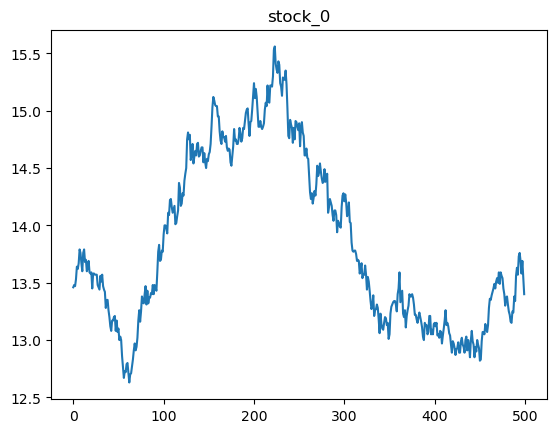

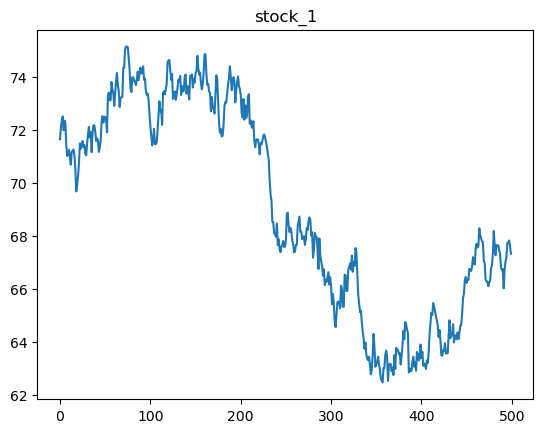

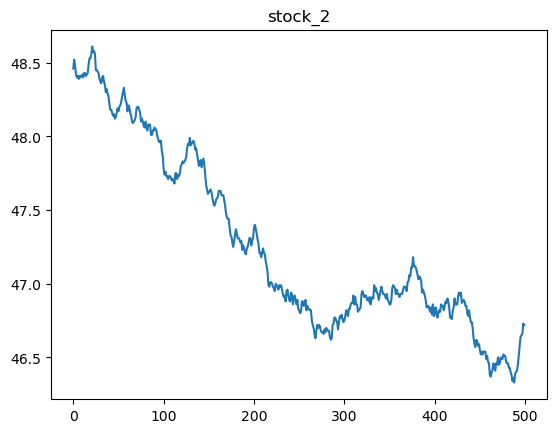

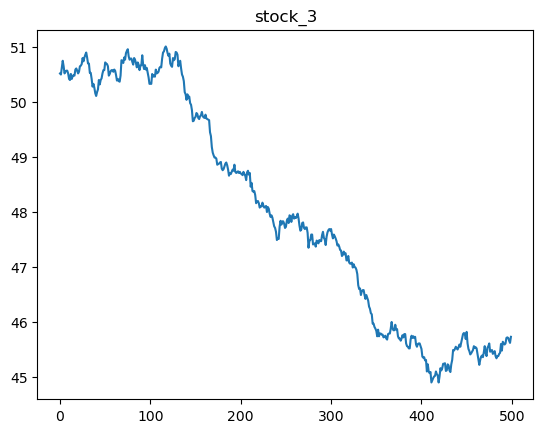

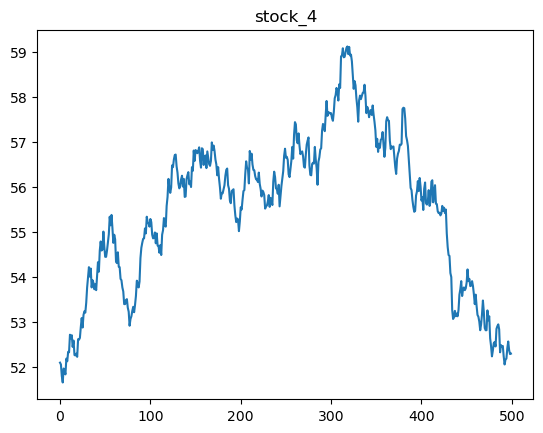

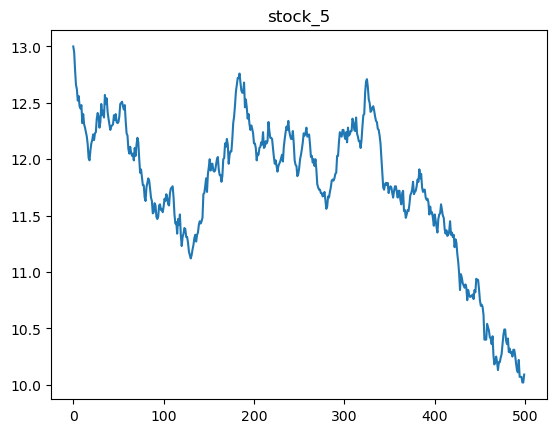

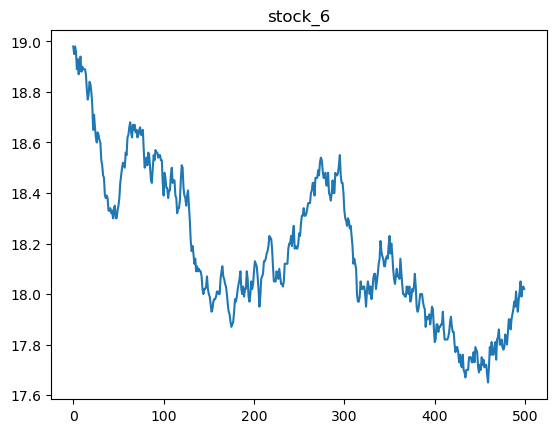

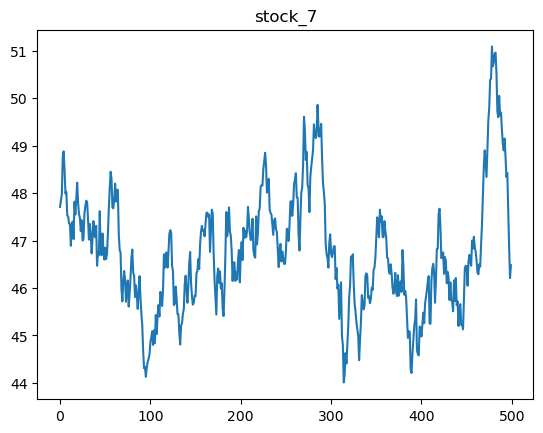

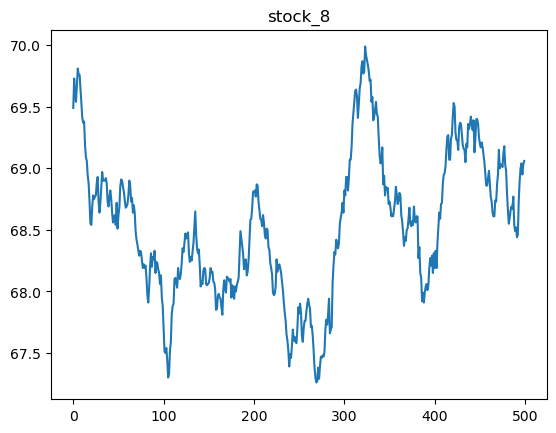

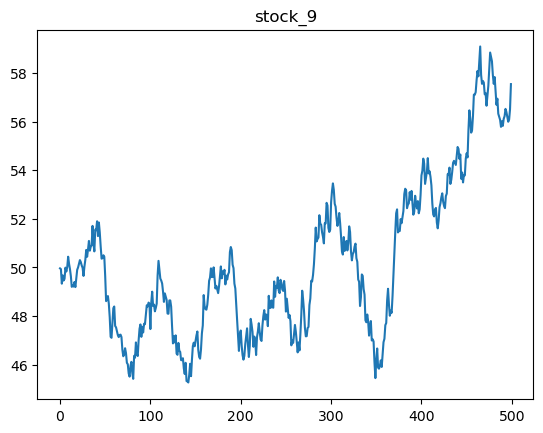

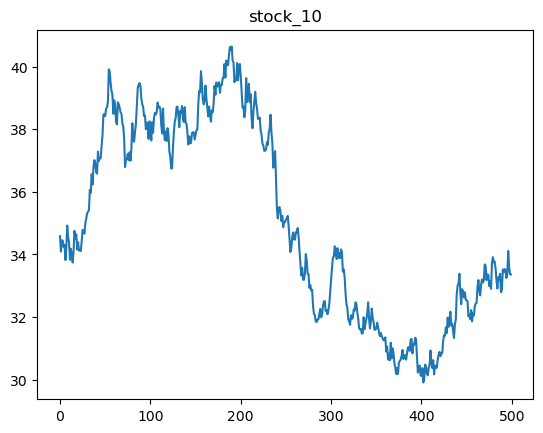

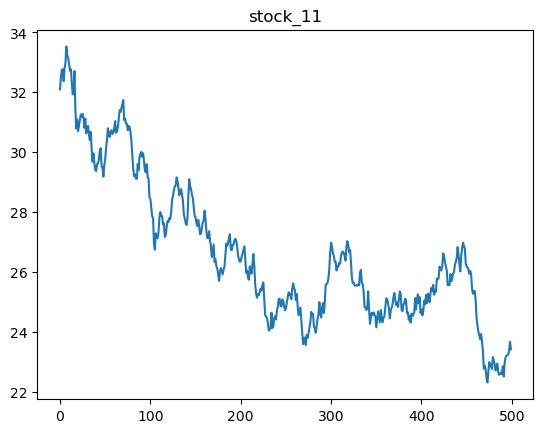

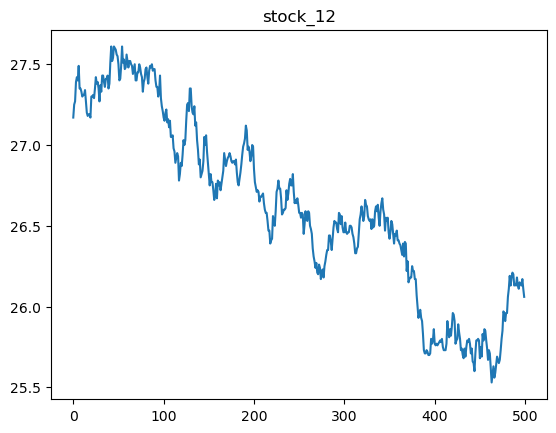

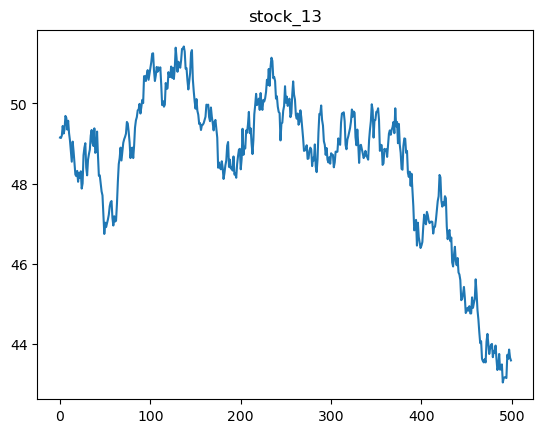

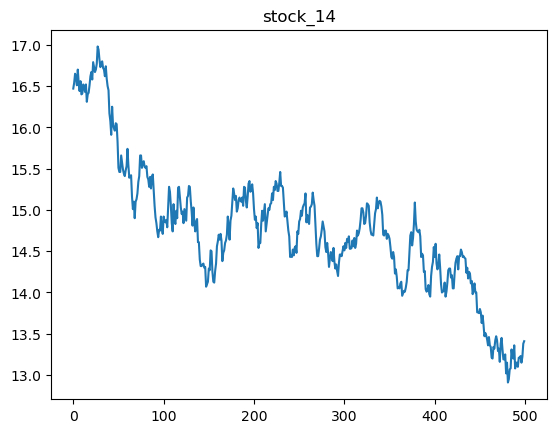

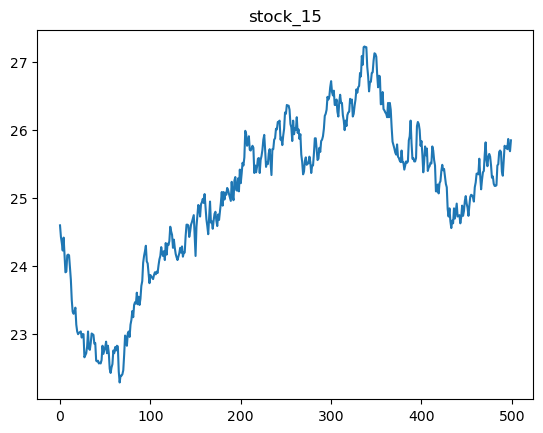

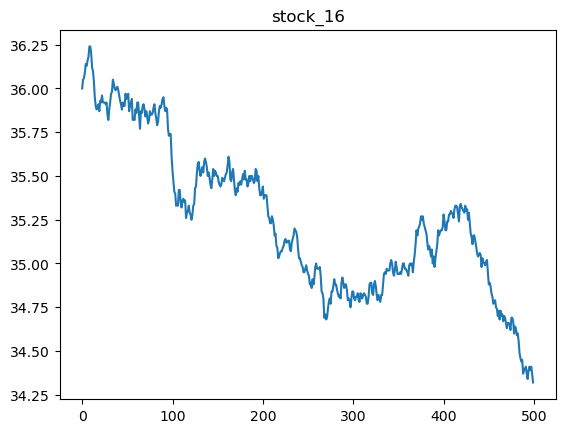

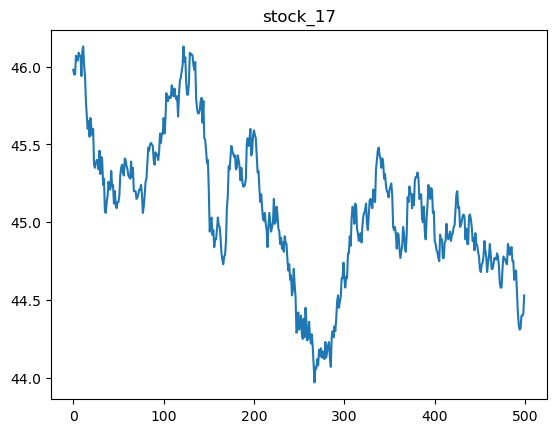

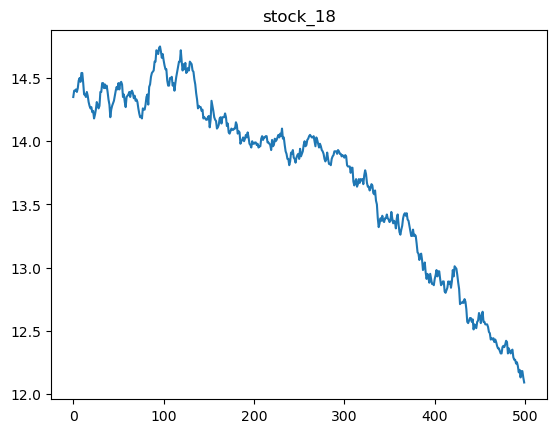

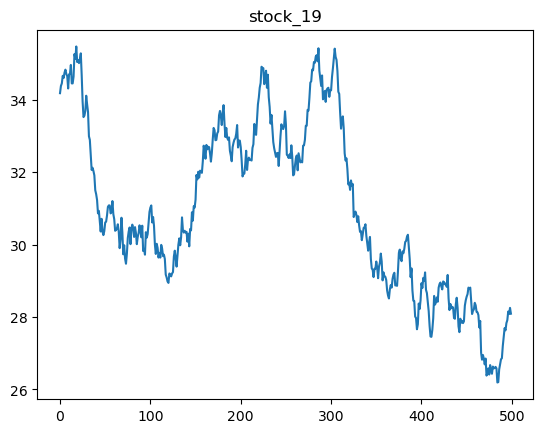

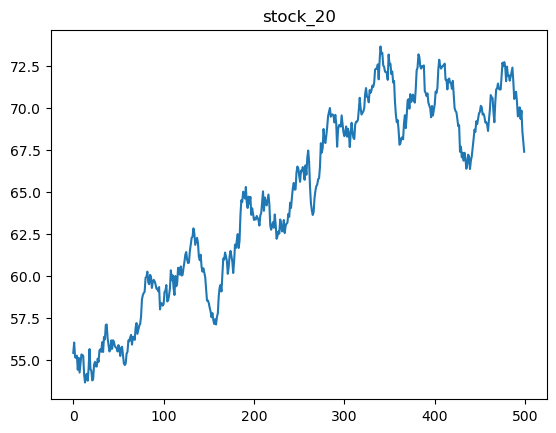

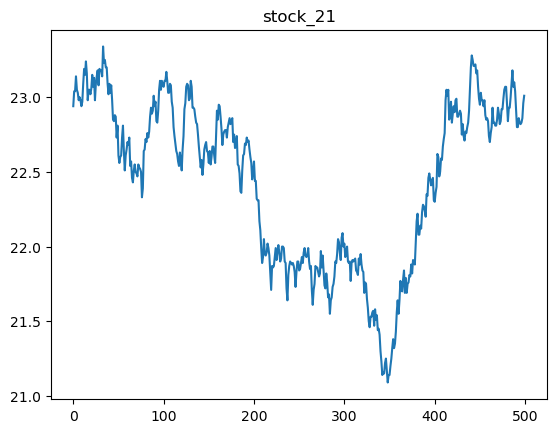

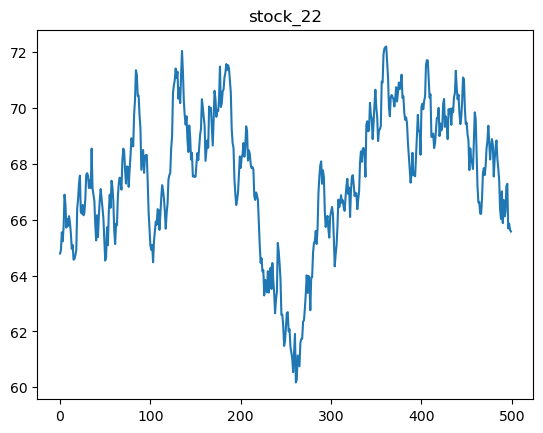

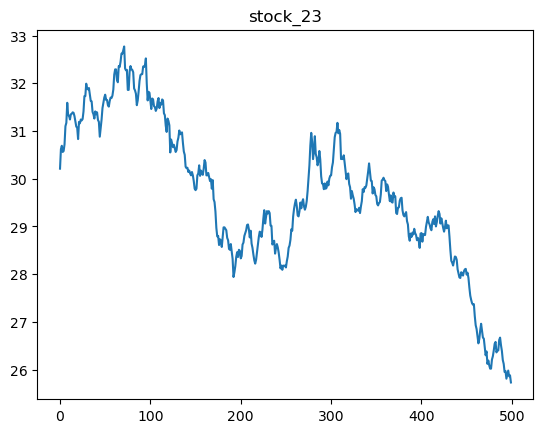

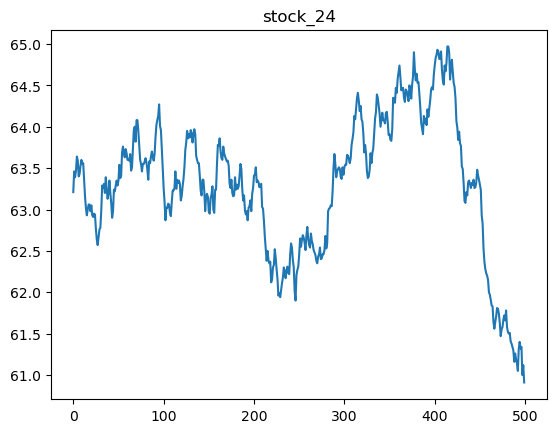

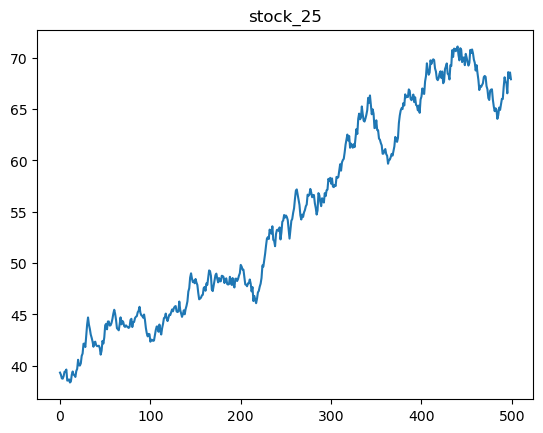

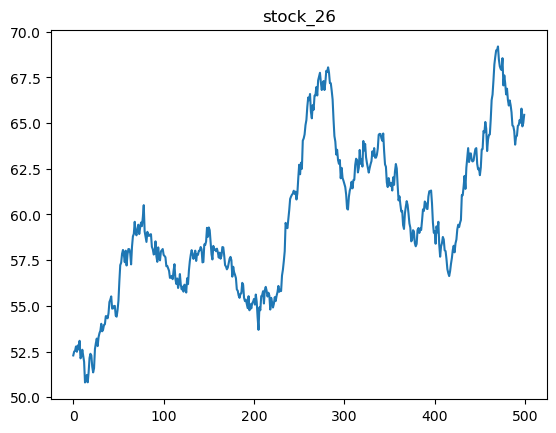

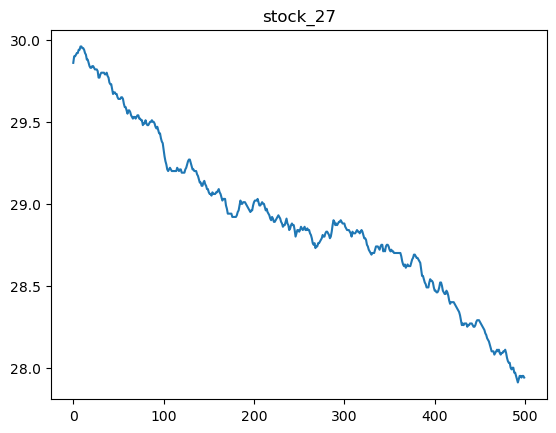

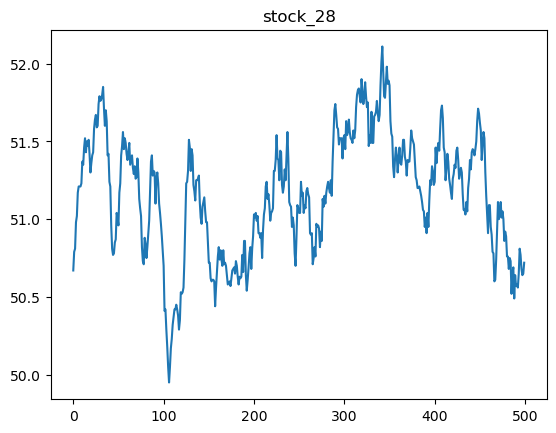

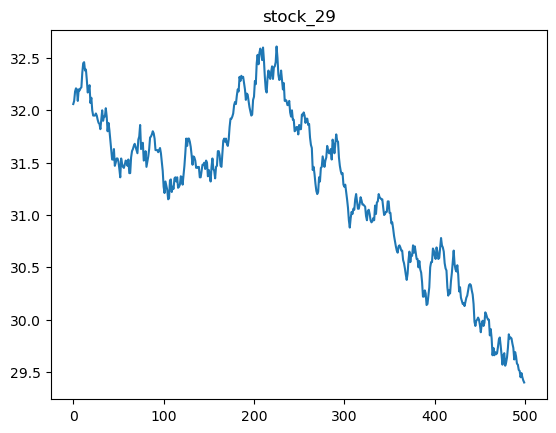

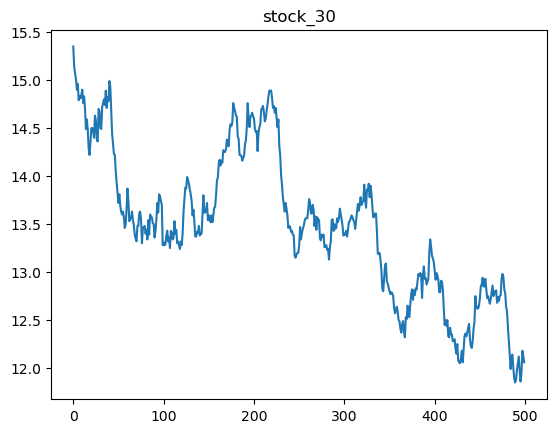

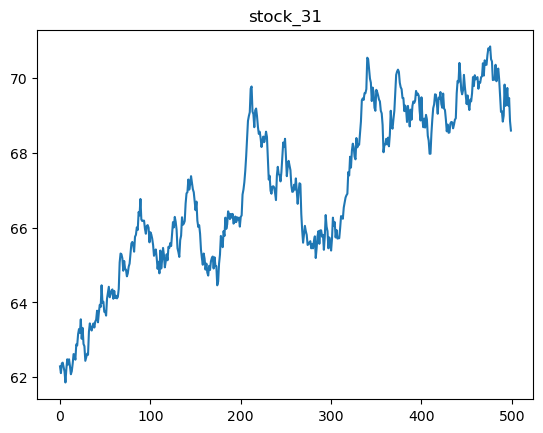

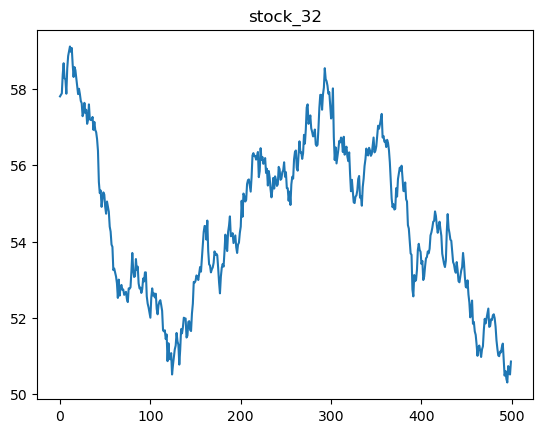

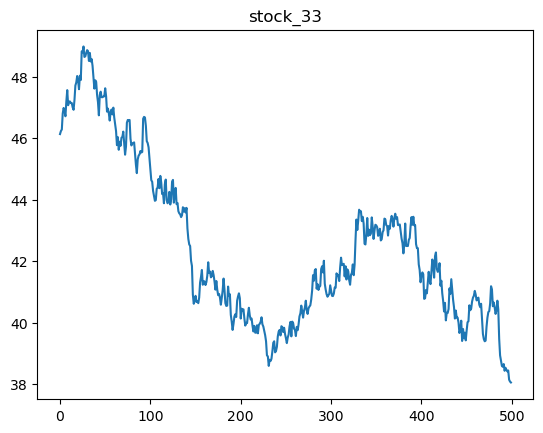

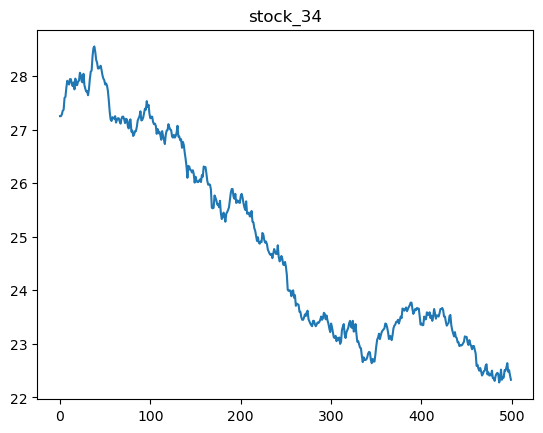

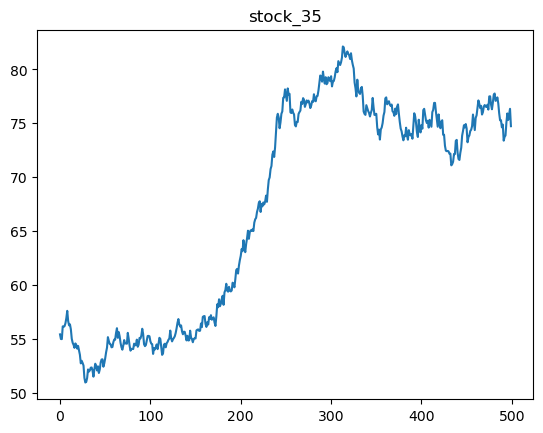

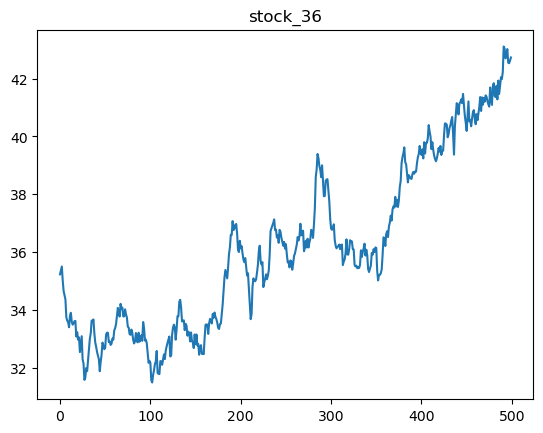

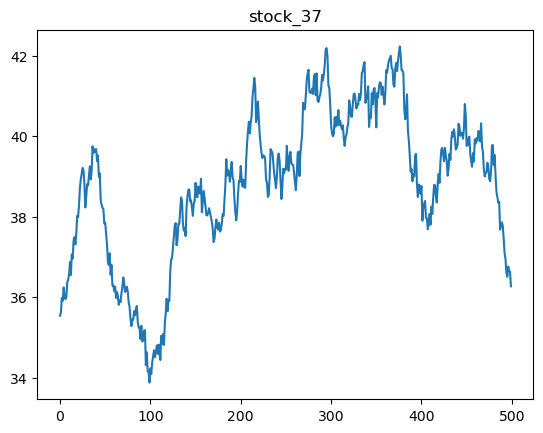

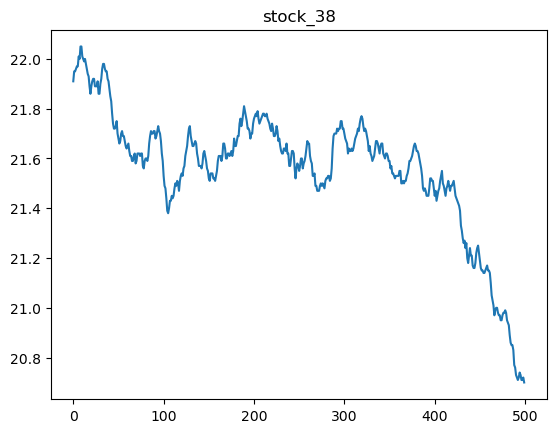

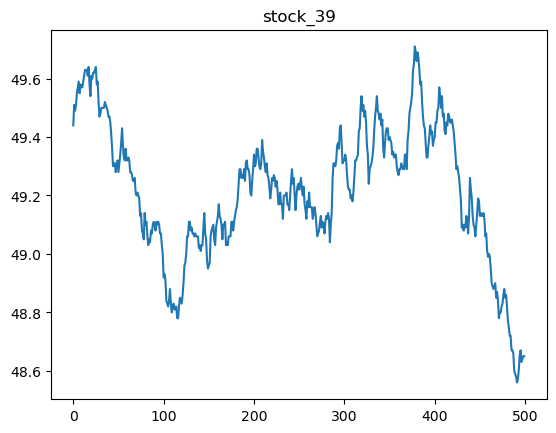

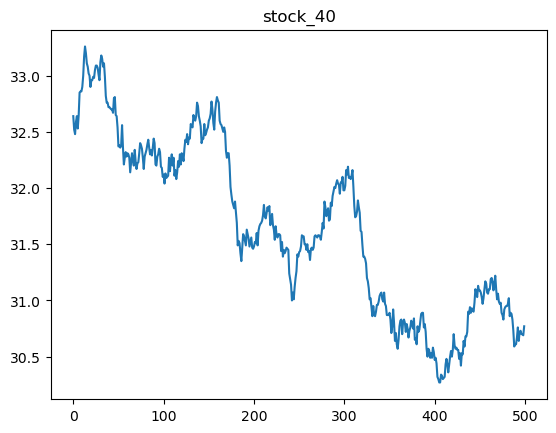

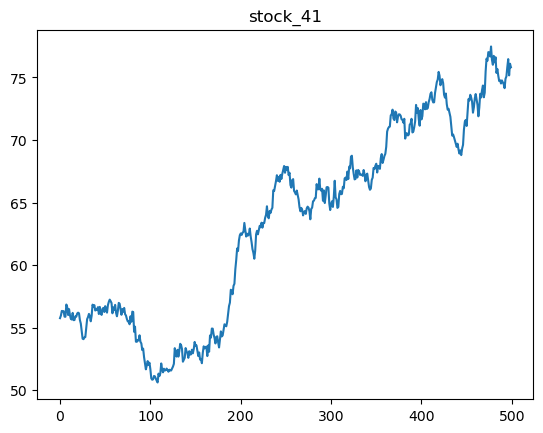

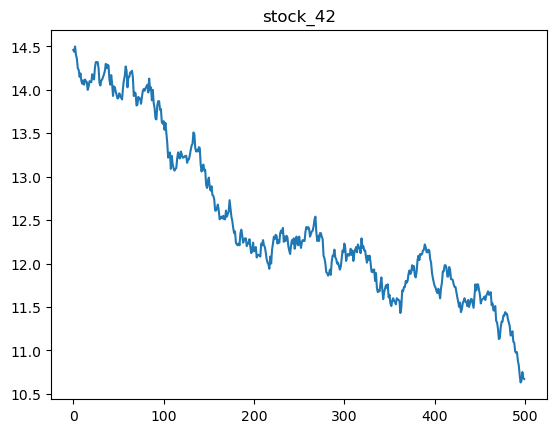

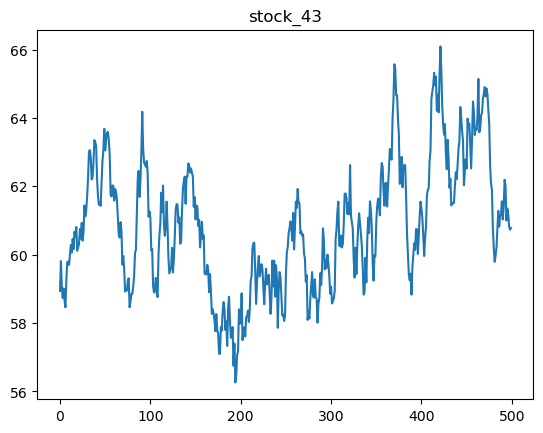

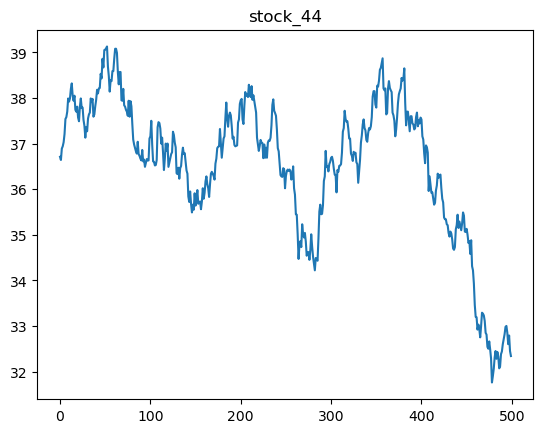

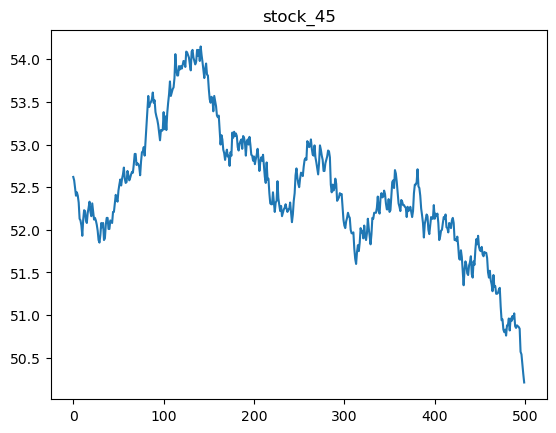

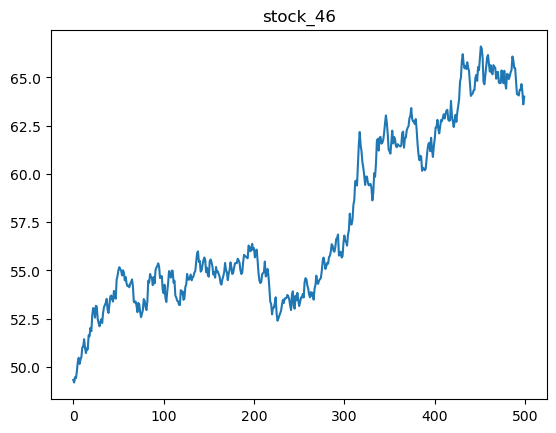

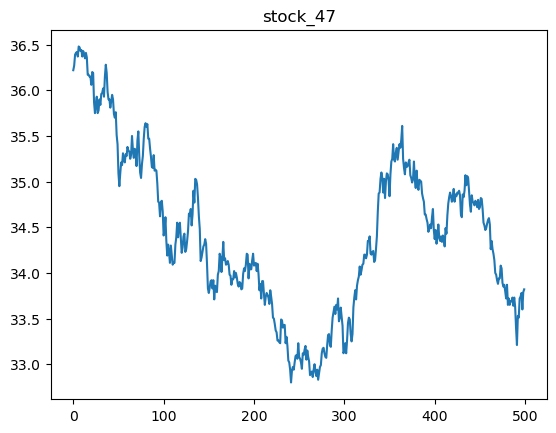

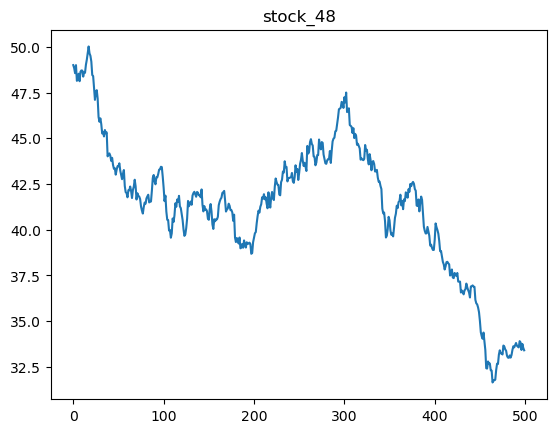

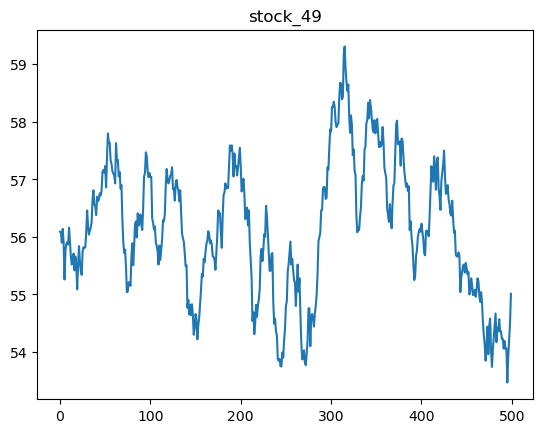

<Figure size 640x480 with 0 Axes>

In [152]:
for i in range(50):
    plt.plot(df[f'stock_{i}'])
    plt.title(f'stock_{i}')
    plt.figure()

In [136]:
df.loc[len(df) - 1, 'stock_3']

45.73

In [143]:
models['stock_3'].params.keys()

Index(['stock_4_lookback_2', 'stock_5_lookback_2', 'stock_7_lookback_3',
       'stock_17_lookback_2', 'stock_18_lookback_3', 'stock_22_lookback_3',
       'stock_30_lookback_1', 'stock_32_lookback_3', 'stock_34_lookback_3',
       'stock_38_lookback_1', 'stock_39_lookback_1', 'stock_42_lookback_3',
       'stock_44_lookback_2', 'stock_49_lookback_2'],
      dtype='object')

In [166]:
df['stock_3']

0      50.52
1      50.50
2      50.62
3      50.75
4      50.65
       ...  
495    45.72
496    45.71
497    45.66
498    45.62
499    45.73
Name: stock_3, Length: 500, dtype: float64

In [187]:
df_stock

,stock_49,stock_49_lookback_0,stock_20_lookback_2,stock_24_lookback_2
3,56.14,0.24,0.61,0.25
4,55.90,-0.24,-0.87,-0.07
5,55.26,-0.64,-0.05,0.08
6,55.76,0.50,0.14,0.17
7,55.88,0.12,-0.84,-0.05
...,...,...,...,...
245,53.75,0.00,0.55,-0.15
246,53.99,0.24,0.30,-0.09
247,53.90,-0.09,-0.40,-0.29
248,54.21,0.31,0.02,-0.11
